In [1]:
library(ggplot2)
library(ggtreeExtra)
library(ggtree)
library(treeio)
library(dplyr)
library(ape)

ggtreeExtra v1.12.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166 

ggtree v3.10.1 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods
for mapping and visualizing associated data on phylogeny usi

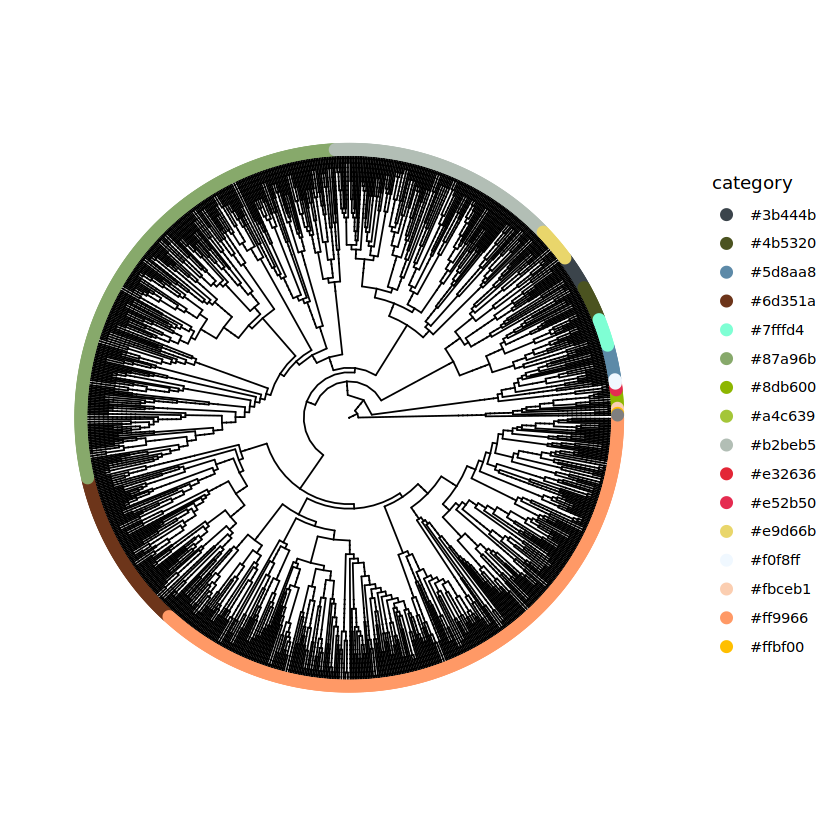

In [3]:

# Load the Newick format tree
tree <- read.tree("/data3/wangkun/mtsim_res/20240903/const_100/112603/gt_tree.nwk")

# Basic tree visualization
p <- ggtree(tree,layout = "circular",branch.length="none") + theme_tree()

# Read the file
lines <- readLines("/data3/wangkun/mtsim_res/20240903/const_100/112603/tree_color_30.txt")

# Extract the tip_label and category
data <- do.call(rbind, lapply(lines, function(line) {
  parts <- strsplit(line, " ")[[1]]
  tip_label <- parts[1]
  category <- parts[2]
  return(c(tip_label, category))
}))

# Convert to data.frame
df <- data.frame(tip_label = data[, 1], category = data[, 2], stringsAsFactors = FALSE)
categories <- unique(df$category)
color_vector <- setNames(categories, categories)

# # Merge the data with the tree
p <- p %<+% df

# # Add the color ring
p <- p + geom_tippoint(aes(color = category), size = 3) +
    scale_color_manual(values = color_vector)

# Display the tree
print(p)

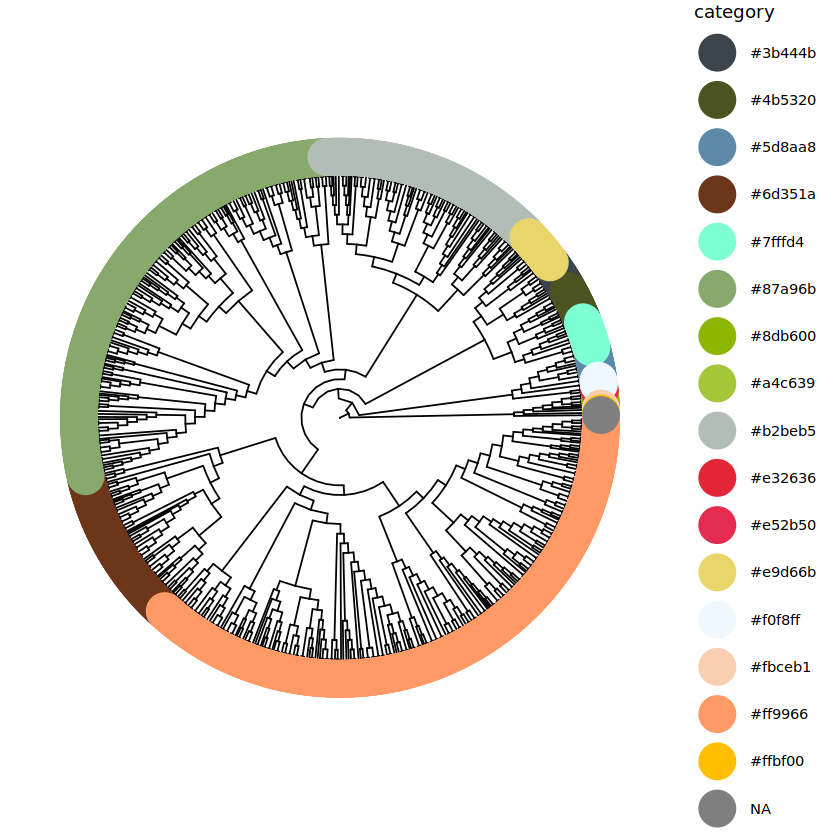

In [8]:

# Load the Newick format tree
tree <- read.tree("/data3/wangkun/mtsim_res/20240903/const_100/112603/gt_tree_30.nwk")

# Basic tree visualization
p <- ggtree(tree,layout = "circular",branch.length="none") + theme_tree()

# Read the file
lines <- readLines("/data3/wangkun/mtsim_res/20240903/const_100/112603/tree_color_30.txt")

# Extract the tip_label and category
data <- do.call(rbind, lapply(lines, function(line) {
  parts <- strsplit(line, " ")[[1]]
  tip_label <- parts[1]
  category <- parts[2]
  return(c(tip_label, category))
}))

# Convert to data.frame
df <- data.frame(tip_label = data[, 1], category = data[, 2], stringsAsFactors = FALSE)
categories <- unique(df$category)
color_vector <- setNames(categories, categories)

# # Merge the data with the tree
p <- p %<+% df

# # Add the color ring
p <- p + geom_tippoint(aes(color = category), size = 10) +
    scale_color_manual(values = color_vector)

# Display the tree
print(p)

In [13]:


# Load the Newick format tree
tree <- read.tree("/data3/wangkun/mtsim_res/20240903/const_100/112603/gt_tree.nwk")

# Basic tree visualization
p <- ggtree(tree,layout = "circular",branch.length="none") + theme_tree()

# Read the file
lines <- readLines("/data3/wangkun/mtsim_res/20240903/const_100/112603/tree_color_30.txt")
# Extract the tip_label and category

data <- do.call(rbind, lapply(lines, function(line) {
  parts <- strsplit(line, " ")[[1]]
  tip_label <- parts[1]
  category <- parts[2]
  return(c(tip_label, category))
}))

# Convert to data.frame
df <- data.frame(tip_label = data[, 1], category = data[, 2], stringsAsFactors = FALSE)

# Ensure the tip labels in the tree match those in the data frame
tree_data <- fortify(tree)
tree_data <- tree_data %>%
  left_join(df, by = c("label" = "tip_label"))

# Create a named vector for colors
categories <- unique(df$category)
color_vector <- setNames(categories, categories)

# Merge the data with the tree
p <- p %<+% tree_data

# Add the color ring using geom_fruit
p <- p + geom_fruit(
  data = df,
  geom = geom_point,
  mapping = aes(y = tip_label, color = category),
  size = 3
) + scale_color_manual(values = color_vector)

# Display the tree
print(p)

! The following column names/name: category are/is the same to tree data, the tree data column names are : label, y, angle, category.



ERROR: [1m[33mError[39m in `geom_point()`:[22m
[1m[22m[33m![39m Problem while computing aesthetics.
[36mℹ[39m Error occurred in the 3rd layer.
[1mCaused by error:[22m
[33m![39m object 'category' not found


In [2]:
# for (file in files){
file <- 'T2_a3030_1-9-489.phy.treefile'
tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3030_ML/merge/',file))
tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)
tree <- drop.tip(tree,tree$tip.label[!(tree$tip.label %in% metadata$cellName)])

tree_plot <- ggtree(tree,layout = 'fan', open.angle = 0,branch.length='none',size=0.5)

tree_plot$data$Time <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','Time'] <- metadata[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'time']

tree_plot$data$cluster <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','cluster'] <- as.character(metadata[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'seurat_clusters'])


options(repr.plot.width=6, repr.plot.height=6)
plot <- tree_plot +
     new_scale_fill() +
     geom_fruit(
         geom=geom_tile,
         mapping=aes(fill=cluster),
         pwidth=max(tree_plot$data$x)*0.1,
         offset=0.05
     ) + scale_fill_manual(
         name="cluster",
         breaks=c('0','1','2','3','4','5','6','7','8'),
         values=c('#6a3d9a','#a6cee3','#33a02c','#1f78b4','#fb9a99','#ff7f00','#fdbf6f','#e31a1c','#cab2d6'),
         guide=guide_legend(keywidth=1, keyheight=1, ncol=1)
     )

Warning message in file(file, "r"):
“cannot open file '/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3030_ML/merge/T2_a3030_1-9-489.phy.treefile': No such file or directory”


ERROR: Error in file(file, "r"): cannot open the connection
